In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
corn = pd.read_csv("_corn-prices-historical-chart-data.csv", skiprows=15)
corn = corn.rename(columns={'date': 'time', ' value': 'corn_price'})
corn.head()

,time,corn_price
0,1959-07-01,1.177
1,1959-07-02,1.176
2,1959-07-06,1.171
3,1959-07-07,1.171
4,1959-07-08,1.170


In [6]:
wheat = pd.read_csv("_wheat-prices-historical-chart-data.csv", skiprows=15)
wheat = wheat.rename(columns={'date': 'time', ' value': 'wheat_price'})
wheat.head()

,time,wheat_price
0,1959-07-01,1.964
1,1959-07-02,1.971
2,1959-07-06,1.970
3,1959-07-07,1.971
4,1959-07-08,1.964


In [7]:
billion_dollar_events = pd.read_csv("billion_dollar_events.csv", skiprows = 2)
billion_dollar_events.head()

,Name,Disaster,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths
0,Southern Severe Storms and Flooding (April 1980),Flooding,19800410,19800417,2749.4,706.8,7
1,Hurricane Allen (August 1980),Tropical Cyclone,19800807,19800811,2236.2,590.0,13
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,19800601,19801130,40681.2,10020.0,1260
3,Florida Freeze (January 1981),Freeze,19810112,19810114,2076.4,572.0,0
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,19810505,19810510,1409.1,401.4,20


In [8]:
# Data Cleaning starts below

In [9]:
corn['time'] = pd.to_datetime(corn['time'])
corn = corn[(corn['time'].dt.year >= 2000) & (corn['time'].dt.year <= 2010)]
corn

,time,corn_price
10205,2000-01-03,2.0075
10206,2000-01-04,2.0300
10207,2000-01-05,2.0300
10208,2000-01-06,2.0375
10209,2000-01-07,2.0700
...,...,...
12971,2010-12-27,6.1525
12972,2010-12-28,6.2325
12973,2010-12-29,6.2400
12974,2010-12-30,6.1600


In [10]:
wheat['time'] = pd.to_datetime(wheat['time'])
wheat = wheat[(wheat['time'].dt.year >= 2000) & (wheat['time'].dt.year <= 2010)]
wheat.tail()

,time,wheat_price
12971,2010-12-27,7.8025
12972,2010-12-28,7.9825
12973,2010-12-29,7.9925
12974,2010-12-30,7.8475
12975,2010-12-31,7.9425


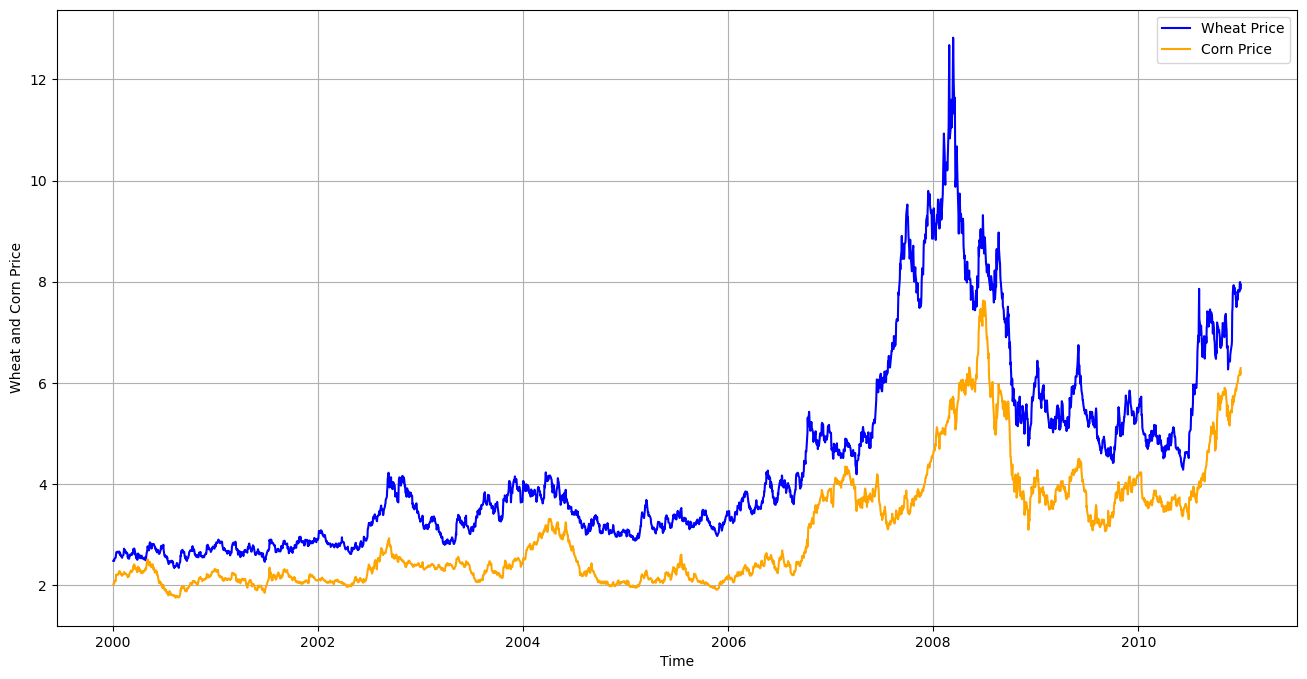

In [11]:
plt.figure(figsize=(16, 8))
plt.plot(wheat["time"], wheat["wheat_price"], label="Wheat Price",color="blue")
plt.plot(corn["time"], corn["corn_price"], label="Corn Price",color="orange")
plt.xlabel("Time")
plt.ylabel("Wheat and Corn Price")
plt.legend()
plt.grid(True)
plt.show()

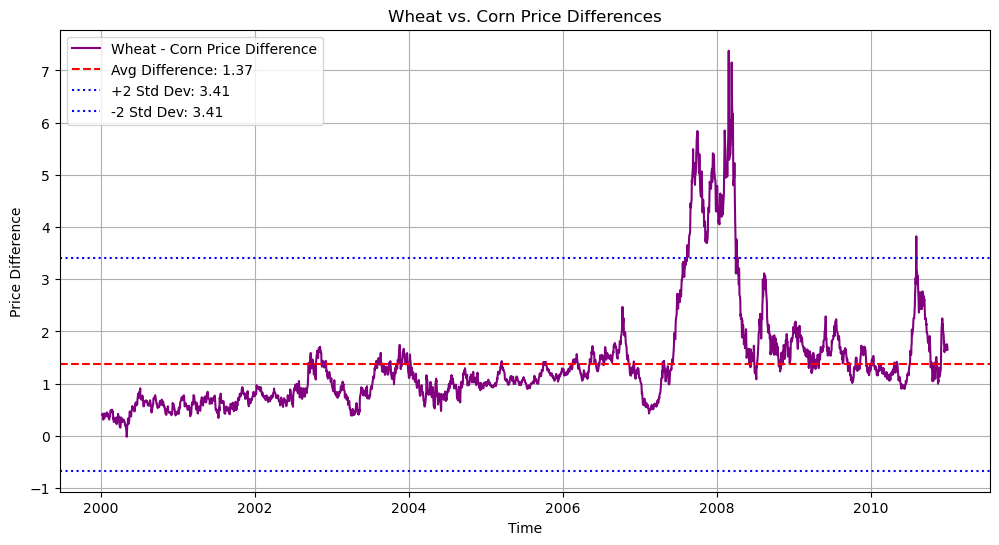

In [12]:
import matplotlib.pyplot as plt

differences = wheat["wheat_price"] - corn["corn_price"]

average_difference = differences.mean()
std_difference = differences.std()


plt.figure(figsize=(12, 6))
plt.plot(corn["time"], differences, label="Wheat - Corn Price Difference", color="purple")

plt.axhline(y=average_difference, color='red', linestyle='--', label=f"Avg Difference: {average_difference:.2f}")
plt.axhline(y=average_difference + 2*std_difference, color='blue', linestyle='dotted', label=f"+2 Std Dev: {average_difference + 2*std_difference:.2f}")
plt.axhline(y=average_difference - 2*std_difference, color='blue', linestyle='dotted', label=f"-2 Std Dev: {average_difference +2*std_difference:.2f}")

plt.xlabel("Time")
plt.ylabel("Price Difference")
plt.title("Wheat vs. Corn Price Differences")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
wc_merged = pd.merge(wheat, corn, on="time", how="inner")

correlation = wc_merged["wheat_price"].corr(wc_merged["corn_price"])
std_wheat = wc_merged["wheat_price"].std()
std_corn = wc_merged["corn_price"].std()

print(f"Correlation between wheat and corn prices: {correlation:.4f}")
print(f"Standard deviation of wheat prices: {std_wheat:.4f}")
print(f"Standard deviation of corn prices: {std_corn:.4f}")

Correlation between wheat and corn prices: 0.8889
Standard deviation of wheat prices: 1.8947
Standard deviation of corn prices: 1.1491


In [14]:
# lat_min, lat_max = 36.5, 49.0
# lon_min, lon_max = -104.0, -80.5

# max_day_temp__data = dataset.where(
#     (dataset['lat'] >= lat_min) & (dataset['lat'] <= lat_max) &
#     (dataset['lon'] >= lon_min) & (dataset['lon'] <= lon_max), 
#     drop=True
# )

# print(max_day_temp__data)
# max_day_temp__data.to_dataframe().to_csv("_max_day_temp.csv")

max_day_temp = pd.read_csv("_max_day_temp.csv")
max_day_temp.head()
max_day_temp['time'] = pd.to_datetime(max_day_temp['time'])
max_day_temp['time_bounds'] = pd.to_datetime(max_day_temp['time_bounds'])


max_day_temp_filtered = max_day_temp[(max_day_temp['time'].dt.year >= 2000) & (max_day_temp['time'].dt.year <= 2010)]
max_day_temp_filtered.tail()

max_day_temp_filtered = max_day_temp_filtered.drop(columns=['time_bounds',"bounds"])
max_day_temp_filtered.tail()

max_day_temp_avg = max_day_temp_filtered.groupby(['time', 'lat', 'lon'], as_index=False)['TXx'].mean()
max_day_temp_avg = max_day_temp_avg.rename(columns = {"TXx": "max_day_temp"})
max_day_temp_avg


,time,lat,lon,max_day_temp
0,2000-01-05,36.75,-103.75,293.35178
1,2000-01-05,36.75,-103.25,295.86730
2,2000-01-05,36.75,-102.75,297.86926
3,2000-01-05,36.75,-102.25,298.21940
4,2000-01-05,36.75,-101.75,298.43073
...,...,...,...,...
465295,2010-12-25,48.75,-82.75,272.55080
465296,2010-12-25,48.75,-82.25,272.43840
465297,2010-12-25,48.75,-81.75,272.19614
465298,2010-12-25,48.75,-81.25,272.18515


In [15]:
nan_count = max_day_temp_avg.isna().sum()
nan_count

time            0
lat             0
lon             0
max_day_temp    0
dtype: int64

In [16]:
bio_degree_days = pd.read_csv("_bio_degree_days.csv")
bio_degree_days.head()
bio_degree_days['time'] = pd.to_datetime(bio_degree_days['time'])
bio_degree_days['time_bounds'] = pd.to_datetime(bio_degree_days['time_bounds'])

bio_degree_days_filtered = bio_degree_days[(bio_degree_days['time'].dt.year >= 2000) & (bio_degree_days['time'].dt.year <= 2010)]
bio_degree_days_filtered.tail()

bio_degree_days_filtered = bio_degree_days_filtered.drop(columns=['bounds',"time_bounds", "threshold"])
bio_degree_days_filtered.tail()

bio_eff_days_avg = bio_degree_days_filtered.groupby(['time', 'lat', 'lon'], as_index=False)['BEDD'].mean()
bio_eff_days_avg = bio_eff_days_avg.rename(columns = {"BEDD":"effective_degree_days"})
bio_eff_days_avg

,time,lat,lon,effective_degree_days
0,2000-01-05,36.75,-103.75,6.794754
1,2000-01-05,36.75,-103.25,10.660324
2,2000-01-05,36.75,-102.75,12.471822
3,2000-01-05,36.75,-102.25,13.270727
4,2000-01-05,36.75,-101.75,14.187780
...,...,...,...,...
465295,2010-12-25,48.75,-82.75,0.000000
465296,2010-12-25,48.75,-82.25,0.000000
465297,2010-12-25,48.75,-81.75,0.000000
465298,2010-12-25,48.75,-81.25,0.000000


In [17]:
nan_count2 = bio_eff_days_avg.isna().sum()
nan_count2

time                     0
lat                      0
lon                      0
effective_degree_days    0
dtype: int64

In [18]:
ice_days = pd.read_csv("_ice_days.csv")
ice_days.head()

ice_days['time'] = pd.to_datetime(ice_days['time'])
ice_days['time_bounds'] = pd.to_datetime(ice_days['time_bounds'])

ice_days_filtered = ice_days[(ice_days['time'].dt.year >= 2000) & (ice_days['time'].dt.year <= 2010)]
ice_days_filtered.tail()

ice_days_filtered = ice_days_filtered.drop(columns=['bounds',"time_bounds"])
ice_days_filtered.tail()

ice_days_avg = ice_days_filtered.groupby(['time', 'lat', 'lon'], as_index=False)['ID'].mean()
ice_days_avg =ice_days_avg.rename(columns = {"ID" : "ice_days"})
ice_days_avg

,time,lat,lon,ice_days
0,2000-01-05,36.75,-103.75,1.0
1,2000-01-05,36.75,-103.25,1.0
2,2000-01-05,36.75,-102.75,1.0
3,2000-01-05,36.75,-102.25,1.0
4,2000-01-05,36.75,-101.75,2.0
...,...,...,...,...
465295,2010-12-25,48.75,-82.75,11.0
465296,2010-12-25,48.75,-82.25,11.0
465297,2010-12-25,48.75,-81.75,11.0
465298,2010-12-25,48.75,-81.25,11.0


In [19]:
nan_count3 = ice_days_avg.isna().sum()
nan_count3

time        0
lat         0
lon         0
ice_days    0
dtype: int64

In [20]:
heavy_rain_days = pd.read_csv("_more_than_10mm_rain_days.csv")
heavy_rain_days.head()

heavy_rain_days['time'] = pd.to_datetime(heavy_rain_days['time'])
heavy_rain_days['time_bounds'] = pd.to_datetime(heavy_rain_days['time_bounds'])

heavy_rain_days_filtered = heavy_rain_days[(heavy_rain_days['time'].dt.year >= 2000) & (heavy_rain_days['time'].dt.year <= 2010)]
heavy_rain_days_filtered.tail()

heavy_rain_days_filtered = heavy_rain_days_filtered.drop(columns=['bounds',"time_bounds"])
heavy_rain_days_filtered.tail()

heavy_rain_days_avg = heavy_rain_days_filtered.groupby(['time', 'lat', 'lon'], as_index=False)['R10mm'].mean()
heavy_rain_days_avg =heavy_rain_days_avg.rename(columns = {"R10mm": "heavy_rain_days"})
heavy_rain_days_avg

,time,lat,lon,heavy_rain_days
0,2000-01-05,36.75,-103.75,0.0
1,2000-01-05,36.75,-103.25,0.0
2,2000-01-05,36.75,-102.75,0.0
3,2000-01-05,36.75,-102.25,0.0
4,2000-01-05,36.75,-101.75,0.0
...,...,...,...,...
465295,2010-12-25,48.75,-82.75,0.0
465296,2010-12-25,48.75,-82.25,0.0
465297,2010-12-25,48.75,-81.75,0.0
465298,2010-12-25,48.75,-81.25,0.0


In [21]:
heavy_rain_days_avg["heavy_rain_days"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
465295    0.0
465296    0.0
465297    0.0
465298    0.0
465299    0.0
Name: heavy_rain_days, Length: 465300, dtype: float64

In [22]:
nan_count4 = heavy_rain_days_avg.isna().sum()
nan_count4

time               0
lat                0
lon                0
heavy_rain_days    0
dtype: int64

In [23]:
# Starting the data merging process

In [24]:
merged_agriculture = max_day_temp_avg.merge(bio_eff_days_avg, on=['time', 'lat', 'lon'], how='outer')
merged_agriculture = merged_agriculture.merge(ice_days_avg, on=['time', 'lat', 'lon'], how='outer')
merged_agriculture = merged_agriculture.merge(heavy_rain_days_avg, on=['time', 'lat', 'lon'], how='outer')

merged_agriculture.head()

,time,lat,lon,max_day_temp,effective_degree_days,ice_days,heavy_rain_days
0,2000-01-05,36.75,-103.75,293.35178,6.794754,1.0,0.0
1,2000-01-05,36.75,-103.25,295.86730,10.660324,1.0,0.0
2,2000-01-05,36.75,-102.75,297.86926,12.471822,1.0,0.0
3,2000-01-05,36.75,-102.25,298.21940,13.270727,1.0,0.0
4,2000-01-05,36.75,-101.75,298.43073,14.187780,2.0,0.0


In [25]:
merged_agriculture.isna().sum()

time                     0
lat                      0
lon                      0
max_day_temp             0
effective_degree_days    0
ice_days                 0
heavy_rain_days          0
dtype: int64

In [26]:
wc_merged

,time,wheat_price,corn_price
0,2000-01-03,2.4750,2.0075
1,2000-01-04,2.4725,2.0300
2,2000-01-05,2.4975,2.0300
3,2000-01-06,2.4850,2.0375
4,2000-01-07,2.5175,2.0700
...,...,...,...
2762,2010-12-27,7.8025,6.1525
2763,2010-12-28,7.9825,6.2325
2764,2010-12-29,7.9925,6.2400
2765,2010-12-30,7.8475,6.1600


In [27]:
final_merged_data = wc_merged.merge(merged_agriculture, on=['time'], how='inner')

final_merged_data[final_merged_data["time"]=="2000-01-05"]

,time,wheat_price,corn_price,lat,lon,max_day_temp,effective_degree_days,ice_days,heavy_rain_days
0,2000-01-05,2.4975,2.03,36.75,-103.75,293.35178,6.794754,1.0,0.0
1,2000-01-05,2.4975,2.03,36.75,-103.25,295.86730,10.660324,1.0,0.0
2,2000-01-05,2.4975,2.03,36.75,-102.75,297.86926,12.471822,1.0,0.0
3,2000-01-05,2.4975,2.03,36.75,-102.25,298.21940,13.270727,1.0,0.0
4,2000-01-05,2.4975,2.03,36.75,-101.75,298.43073,14.187780,2.0,0.0
...,...,...,...,...,...,...,...,...,...
1170,2000-01-05,2.4975,2.03,48.75,-82.75,274.93704,0.000000,7.0,0.0
1171,2000-01-05,2.4975,2.03,48.75,-82.25,274.85336,0.000000,9.0,0.0
1172,2000-01-05,2.4975,2.03,48.75,-81.75,274.69165,0.000000,9.0,0.0
1173,2000-01-05,2.4975,2.03,48.75,-81.25,274.89636,0.000000,9.0,0.0


In [28]:
final_merged_data.isna().sum()

time                     0
wheat_price              0
corn_price               0
lat                      0
lon                      0
max_day_temp             0
effective_degree_days    0
ice_days                 0
heavy_rain_days          0
dtype: int64

In [29]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=2, output_size=10):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)  
        
    def forward(self, x):
        lstm_out, o = self.lstm(x)
        return self.fc(lstm_out[:, -1, :]) 

In [30]:
def create_sequences(data, seq_length, output_size):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length - output_size):  
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length:i+seq_length+output_size]) 
    return np.array(sequences), np.array(targets)

scaler = MinMaxScaler(feature_range=(0, 1))
real_corn_scaled = scaler.fit_transform(corn["corn_price"].values.reshape(-1, 1))

seq_length = 30
output_size = 10  
X, y = create_sequences(real_corn_scaled, seq_length, output_size)

# I am splitting it this way because it is timeseries data
# Shuffling will ruin the dependencies I am trying to detect

train_size = int(len(X) * 0.8)
val_size = int(len(X) * 0.1)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]


X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_val, y_val = torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)


input_size = 1 
model = LSTMModel(input_size, output_size=output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch [0/50], Train Loss: 0.085169, Val Loss: 0.134381, Test Loss: 0.218191
Epoch [5/50], Train Loss: 0.067918, Val Loss: 0.104231, Test Loss: 0.180517
Epoch [10/50], Train Loss: 0.051879, Val Loss: 0.070518, Test Loss: 0.136824
Epoch [15/50], Train Loss: 0.039109, Val Loss: 0.031709, Test Loss: 0.081505
Epoch [20/50], Train Loss: 0.037010, Val Loss: 0.017984, Test Loss: 0.059635
Epoch [25/50], Train Loss: 0.033208, Val Loss: 0.026350, Test Loss: 0.073043
Epoch [30/50], Train Loss: 0.032831, Val Loss: 0.029047, Test Loss: 0.075676
Epoch [35/50], Train Loss: 0.030158, Val Loss: 0.020401, Test Loss: 0.059554
Epoch [40/50], Train Loss: 0.025479, Val Loss: 0.010476, Test Loss: 0.037121
Epoch [45/50], Train Loss: 0.014012, Val Loss: 0.004566, Test Loss: 0.012140


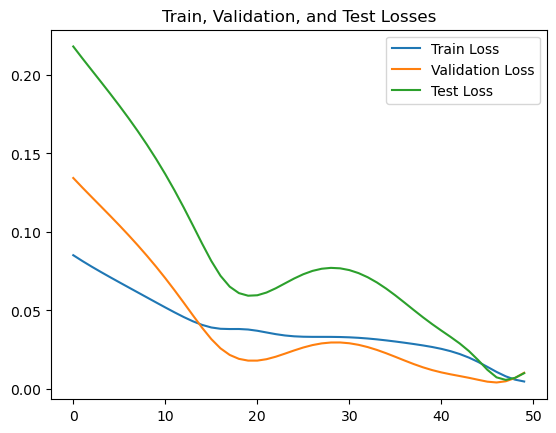

In [31]:
train_losses = []
val_losses = []
test_losses = []

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train.squeeze())  
    loss.backward()
    optimizer.step()

    
    model.eval()
    with torch.no_grad():
        y_pred_val = model(X_val).squeeze()
        val_loss = criterion(y_pred_val, y_val.squeeze())
        
        y_pred_test = model(X_test).squeeze()
        test_loss = criterion(y_pred_test, y_test.squeeze())
        
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    test_losses.append(test_loss.item())
    
    if epoch % 5 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Train Loss: {loss.item():.6f}, Val Loss: {val_loss.item():.6f}, Test Loss: {test_loss.item():.6f}")


plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.plot(test_losses, label="Test Loss")
plt.title("Train, Validation, and Test Losses")
plt.legend()
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test).squeeze().numpy()
    y_pred_train = model(X_train).squeeze().numpy()
    y_pred_val = model(X_val).squeeze().numpy()


y_pred_test_flat = y_pred_test.reshape(-1, 1)
y_test_flat = y_test.reshape(-1, 1)
y_pred_train_flat = y_pred_train.reshape(-1, 1)
y_train_flat = y_train.reshape(-1, 1)
y_pred_val_flat = y_pred_val.reshape(-1, 1)
y_val_flat = y_val.reshape(-1, 1)


y_pred_test = scaler.inverse_transform(y_pred_test_flat)
y_test = scaler.inverse_transform(y_test_flat)
y_pred_train = scaler.inverse_transform(y_pred_train_flat)
y_train = scaler.inverse_transform(y_train_flat)
y_pred_val = scaler.inverse_transform(y_pred_val_flat)
y_val = scaler.inverse_transform(y_val_flat)

y_pred_test = y_pred_test.reshape(-1, 10, 1)
y_test = y_test.reshape(-1, 10, 1)
y_pred_train = y_pred_train.reshape(-1, 10, 1)
y_train = y_train.reshape(-1, 10, 1)
y_pred_val = y_pred_val.reshape(-1, 10, 1)
y_val = y_val.reshape(-1, 10, 1)

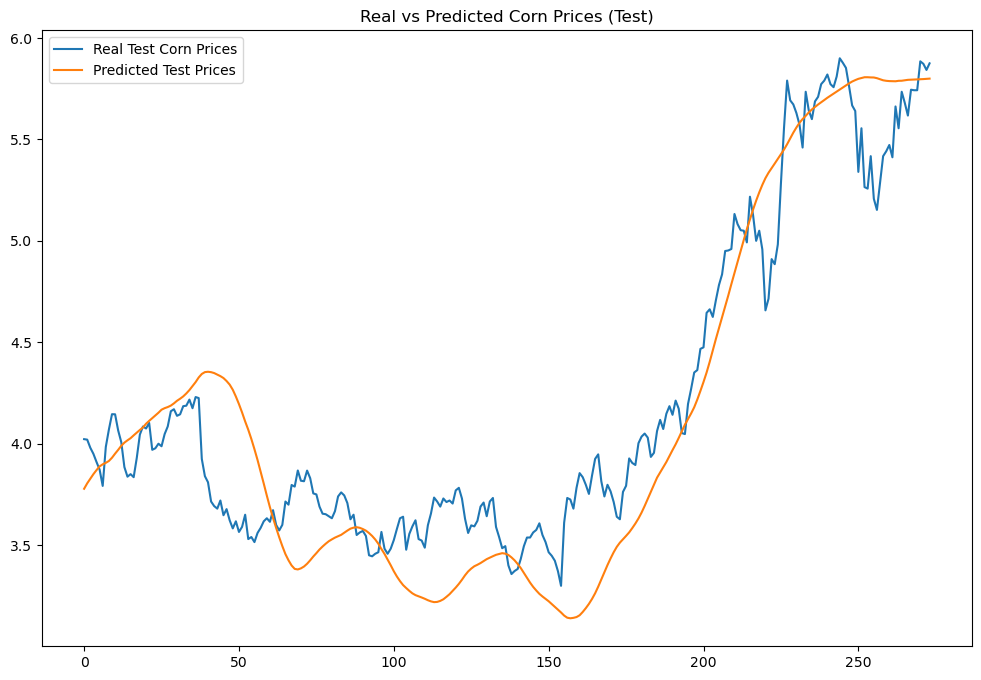

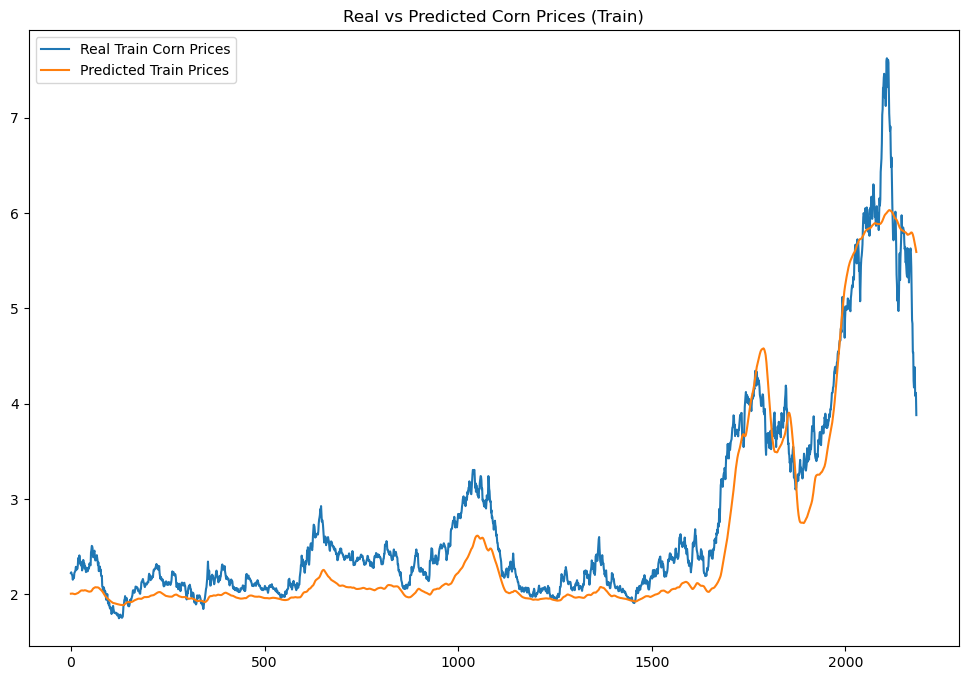

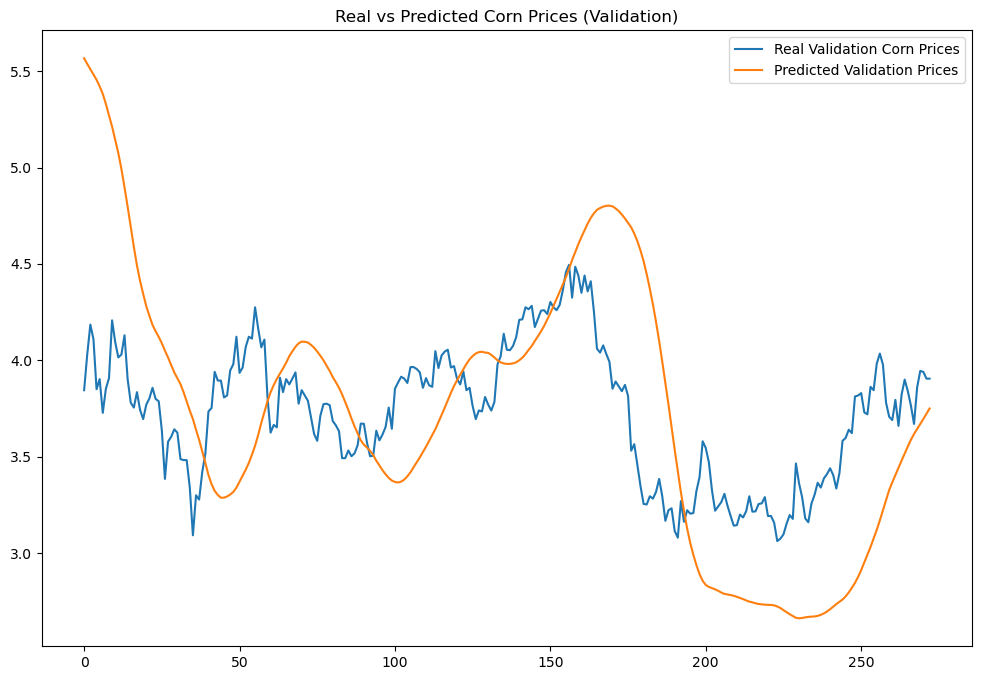

In [41]:
plt.figure(figsize=(12, 8))
plt.plot(y_test[:, 0], label="Real Test Corn Prices")
plt.plot(y_pred_test[:, 0], label="Predicted Test Prices")
plt.title("Real vs Predicted Corn Prices (Test)")
plt.legend()
plt.show()


plt.figure(figsize=(12, 8))
plt.plot(y_train[:, 0], label="Real Train Corn Prices")
plt.plot(y_pred_train[:, 0], label="Predicted Train Prices")
plt.title("Real vs Predicted Corn Prices (Train)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(y_val[:, 0], label="Real Validation Corn Prices")
plt.plot(y_pred_val[:, 0], label="Predicted Validation Prices")
plt.title("Real vs Predicted Corn Prices (Validation)")
plt.legend()
plt.show()